[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-2/state-reducers.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58239428-lesson-2-state-reducers)

In [1]:
%%capture --no-stderr
%pip install --quiet -U langchain_core langgraph
from IPython.display import Image, display

# MY EXAMPLES 

## Defined my own reducer with the operator add function

In [2]:
# Cell 1: Imports and Reducer Definition
import operator
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

# State schema with reducer
class State(TypedDict):
    updates: Annotated[list[str], operator.add]

In [3]:
# Cell 2: Node definitions
def node_a(state: State):
    print("-- Node A --")
    return {"updates": ["A"]}

def node_b(state: State):
    print("-- Node B --")
    return {"updates": ["B"]}

def node_c(state: State):
    print("-- Node C --")
    return {"updates": ["C"]}

def node_d(state: State):
    print("-- Node D --")
    return {"updates": ["D"]}



In [4]:
# Cell 3: Build the graph
builder = StateGraph(State)
builder.add_node("node_a", node_a)
builder.add_node("node_b", node_b)
builder.add_node("node_c", node_c)
builder.add_node("node_d", node_d)

builder.add_edge(START, "node_a")
builder.add_edge("node_a", "node_b")
builder.add_edge("node_a", "node_c")
builder.add_edge("node_b", "node_d")
builder.add_edge("node_c", "node_d")
builder.add_edge("node_d", END)

graph = builder.compile()



In [5]:
# Cell 4: Run the graph
initial_state = {"updates": []}
result = graph.invoke(initial_state)
print("Final state:", result)



-- Node A --
-- Node B --
-- Node C --
-- Node D --
Final state: {'updates': ['A', 'B', 'C', 'D']}


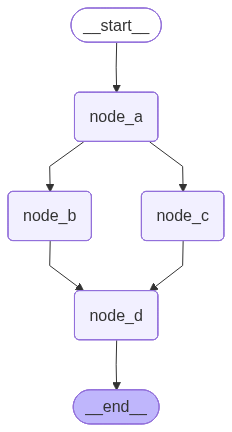

In [6]:
# Cell 5: Visualize (Mermaid)
mermaid_code = graph.get_graph().draw_mermaid()
#print(mermaid_code)
display(Image(graph.get_graph().draw_mermaid_png()))

## Defined my own custom reducer, which keeps only the largest number

In [7]:
# Cell 1: Custom reducer that keeps only the largest number

def max_value_reducer(left: list[int] | None, right: list[int] | None) -> list[int]:
    """
    Combine two lists, but only keep the largest value seen so far.
    """
    all_vals = []
    if left:
        all_vals += left
    if right:
        all_vals += right
    if not all_vals:
        return []
    return [max(all_vals)]  # Only keep max value
# State schema using custom reducer
from typing import Annotated
from typing_extensions import TypedDict

class MaxValueState(TypedDict):
    foo: Annotated[list[int], max_value_reducer]





In [8]:

# Cell 2: Nodes for demo graph
def node_1(state: MaxValueState):
    print("-- Node 1 --")
    return {"foo": [13]}
def node_2(state: MaxValueState):
    print("-- Node 2 --")
    return {"foo": [7]}
def node_3(state: MaxValueState):
    print("-- Node 3 --")
    return {"foo": [5]}
def node_4(state: MaxValueState):
    print("-- Node 4 --")
    return {"foo": [3]}



In [9]:
# Cell 3: Build the graph
from langgraph.graph import StateGraph, START, END

builder = StateGraph(MaxValueState)
builder.add_node("node_1", node_1)
builder.add_node("node_2", node_2)
builder.add_node("node_3", node_3)
builder.add_node("node_4", node_4)

builder.add_edge(START, "node_1")
builder.add_edge("node_1", "node_2")
builder.add_edge("node_1", "node_3")
builder.add_edge("node_2", "node_4")
builder.add_edge("node_3", "node_4")
builder.add_edge("node_4", END)

graph = builder.compile()



## Ran the graph

In [10]:
# Cell 4: Run the graph
init_state = {"foo": []}
result = graph.invoke(init_state)
print("Final reducer state:", result)


-- Node 1 --
-- Node 2 --
-- Node 3 --
-- Node 4 --
Final reducer state: {'foo': [13]}


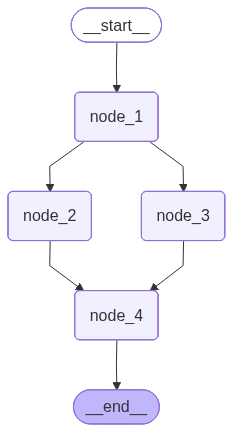

In [11]:
# Cell 5: Visualize (Mermaid)
mermaid_code = graph.get_graph().draw_mermaid()
#print(mermaid_code)
display(Image(graph.get_graph().draw_mermaid_png()))

## Ran some more testcases on the custom reducer 

### testcase 1 

In [12]:
# Testcase 1 - Start with empty list
testcase1 = {"foo": []}
print("Testcase 1 initial state:", testcase1)
result1 = graph.invoke(testcase1)
print("Testcase 1 final state:", result1)
# Output should be {'foo': [13]}


Testcase 1 initial state: {'foo': []}
-- Node 1 --
-- Node 2 --
-- Node 3 --
-- Node 4 --
Testcase 1 final state: {'foo': [13]}


### testcase 2

In [13]:
# Testcase 2 - Start with pre-set higher value
testcase2 = {"foo": [17]}
print("Testcase 2 initial state:", testcase2)
result2 = graph.invoke(testcase2)
print("Testcase 2 final state:", result2)
# Output should be {'foo': [17]}


Testcase 2 initial state: {'foo': [17]}
-- Node 1 --
-- Node 2 --
-- Node 3 --
-- Node 4 --
Testcase 2 final state: {'foo': [17]}


## Tried the in-built message reducer with different examples of my own 

In [14]:
import pprint

In [15]:
# Imports for message reducer examples
from langgraph.graph import MessagesState
from langchain_core.messages import AIMessage, HumanMessage
from langgraph.graph import add_messages


### Appending new messages

In [16]:

#  Append new messages (basic accumulation)
messages1 = [
    AIMessage(content="Welcome, how can I assist?", name="Bot", id="1"),
    HumanMessage(content="What's the weather today?", name="User", id="2")
]
new_message1 = AIMessage(content="Today's weather: sunny!", name="Bot", id="3")
result1 = add_messages(messages1, new_message1)
#print("Messages after append:", result1)
# Use pprint for all your message reducer results
#pretty_print(result1)
pprint.pprint(result1)


[AIMessage(content='Welcome, how can I assist?', additional_kwargs={}, response_metadata={}, name='Bot', id='1'),
 HumanMessage(content="What's the weather today?", additional_kwargs={}, response_metadata={}, name='User', id='2'),
 AIMessage(content="Today's weather: sunny!", additional_kwargs={}, response_metadata={}, name='Bot', id='3')]


### Overwriting a message with the same ID

In [17]:
#  Overwrite a message with same ID
messages2 = [
    HumanMessage(content="What's the weather today?", name="User", id="2")
]
overwrite_message = HumanMessage(content="Actually, give me tomorrow's weather.", name="User", id="2")
result2 = add_messages(messages2, overwrite_message)
#print("Messages after overwrite:", result2)
pprint.pprint(result2)

[HumanMessage(content="Actually, give me tomorrow's weather.", additional_kwargs={}, response_metadata={}, name='User', id='2')]


### Removing a message using RemoveMessage

In [18]:
#  Removing a message using RemoveMessage
from langchain_core.messages import RemoveMessage

messages3 = [
    AIMessage(content="Welcome!", name="Bot", id="1"),
    HumanMessage(content="Hi!", name="User", id="2"),
    AIMessage(content="How can I help you?", name="Bot", id="3"),
]
remove_msg = RemoveMessage(content="", id="2")  # Remove by ID
result3 = add_messages(messages3, remove_msg)
#print("Messages after removal:", result3)
pprint.pprint(result3)


[AIMessage(content='Welcome!', additional_kwargs={}, response_metadata={}, name='Bot', id='1'),
 AIMessage(content='How can I help you?', additional_kwargs={}, response_metadata={}, name='Bot', id='3')]
